<a href="https://colab.research.google.com/github/linamnarvaez/Curso2/blob/master/LinaNarvaez_C2_Tareas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Notebook S1**




Problema 1: Manipulación de Tensores

In [6]:
#Dentro del conjunto de datos, seleccióne la esquina inferior que contenga  14×14  píxeles en cada una de las imágenes y visualice una de ellas
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


11501568/11490434 [==============================] - 0s 0us/step


In [7]:
my_slice_corner = train_images[:, 14:, 14:]
my_slice_corner.shape

(60000, 14, 14)

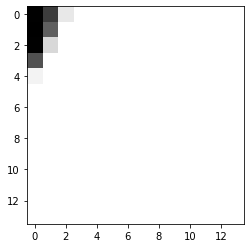

In [8]:
digit = my_slice_corner[3]
import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

Problema 2: Repaso de Funciones y clases


In [9]:
#Escriba un código en Python que devuelva el máximo valor de un vector
def max_array1D(arr): 
     
    max = arr[0] 
     
    for i in range(1, arr.shape[0]): 
        if arr[i] > max: 
            max = arr[i] 
    return max



Problema 3: Clases 


In [ ]:
#Creen una clase Point en coordenadas cartesianas, que se su constructor inicialice el objeto a un punto con unas coordenadas dadas. Además, la clase debe contener dos métodos:

#translate(), que reciba como argumentos dos valores arbitrarios  (x,y) .
#__str__(self): que imprima el punto en precisión de coma flotante.


In [10]:
 class Point:
        
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
    def translate(self, dx, dy):
        self.x += dx
        self.y += dy
        
    def __str__(self):
        return("Point at [%f, %f]" % (self.x, self.y))

**Notebook S2**

Problema 4: Perceptrón Multicapa

Con los siguientes vector, escalar y los datos de entrada de la compuerta lógica AND, escribir una función que regrese las salidas correctas, usando un perceptrón.

W=(11) 

B=−1.5


In [12]:
import numpy as np
def And(X,W,B):
  X1=np.heaviside(np.dot(X,W)+B,1)
  return(X1)
  
X=np.array([[0,0],[0,1],[1,0],[1,1]])
W=np.array([1,1])
B=-1.5
y=And(X,W,B)
print(y)

[0. 0. 0. 1.]


**Notebook S3**

Problema 5: Pipeline

Con ayuda del pipeline de sklearn, construir uno de forma tal qué, escale mis datos, reduzca mi dimensión(dimensión 2) y aplique un clasificador de arbol de decisión (DecisionTreeClassifier) al iris data set, donde a este último solo le pondremos como parámetro el random_state=42. Entrenarlo y evaluarlo.

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

data=load_iris()
X_train,X_test,y_train,y_test=train_test_split(data.data,data.target,test_size=0.2)
model_3=Pipeline([('scaler',StandardScaler()),('pca',PCA(n_components=2)),('des_tree',DecisionTreeClassifier(random_state=42))])

model_3.fit(X_train,y_train)
model_3.score(X_test,y_test)

0.9333333333333333

**Notebook S4**

Problema 6: Gradient Clipping

Entrene una red neuronal en keras para el dataset de Iris con 3 capas ocultas de 4 neuronas cada una con funciones de activación sigmoide. Use gradiente estocástico con gradient clipping



In [24]:
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
data=load_iris()
X,y=data.data,data.target
X-=X.mean(axis=0)
X/=X.std(axis=0)
y=to_categorical(y)
modelo=Sequential()
modelo.add(Dense(4,activation='sigmoid',input_shape=(4,)))
modelo.add(Dense(4,activation='sigmoid'))
modelo.add(Dense(4,activation='sigmoid'))
modelo.add(Dense(3,activation='softmax'))
optim=SGD(clipnorm=1)
modelo.compile(optim,loss='categorical_crossentropy',metrics=['accuracy'])
modelo.summary()
modelo.fit(x=X,y=y, batch_size=10,epochs=500)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 20        
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 3)                 15        
                                                                 
Total params: 75
Trainable params: 75
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
15/15 [==============================] - 1s 2ms/step - loss: 1.1437 - accuracy: 0.3333
Epoch 2/500
15/15 [==============================] - 0s 2ms/step - loss: 1.1369 - accuracy: 0

Problema 7: Optimizadores

Entrene una red neuronal para el dataset iris con 3 capas ocultas de 4 neuronas cada una con función de activación ReLU inicializadando los pesos con glorot_normal y los bias en cero. Aplicar regularización L2 de los pesos y L1 de los bias. Adicionalmente, aplique Batch Normalization en la segunda capa oculta. Entrene la red usando el optimizador Adam con Gradient Clipping y usando un 20% como datos de validación.

In [26]:
from sklearn.datasets import load_iris
from keras.models import Sequential
from keras.layers import Dense,BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
data=load_iris()
X,y=data.data,data.target
X-=X.mean(axis=0)
X/=X.std(axis=0)
y=to_categorical(y)
modelo=Sequential()
modelo.add(Dense(4,activation='relu',kernel_regularizer='l2',bias_regularizer='l1',kernel_initializer='glorot_normal',bias_initializer='zero',input_shape=(4,)))
modelo.add(Dense(4,activation='relu',kernel_regularizer='l2',bias_regularizer='l1',kernel_initializer='glorot_normal',bias_initializer='zero'))
modelo.add(BatchNormalization())
modelo.add(Dense(4,activation='relu',kernel_regularizer='l2',bias_regularizer='l1',kernel_initializer='glorot_normal',bias_initializer='zero'))
modelo.add(Dense(3,activation='softmax',kernel_regularizer='l2',bias_regularizer='l1',kernel_initializer='glorot_normal',bias_initializer='zero'))
optim=Adam(clipnorm=1)
modelo.compile(optim,loss='categorical_crossentropy',metrics=['accuracy'])
modelo.summary()
modelo.fit(x=X,y=y, batch_size=10,epochs=500,validation_split=0.2)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 4)                 20        
                                                                 
 dense_5 (Dense)             (None, 4)                 20        
                                                                 
 batch_normalization (BatchN  (None, 4)                16        
 ormalization)                                                   
                                                                 
 dense_6 (Dense)             (None, 4)                 20        
                                                                 
 dense_7 (Dense)             (None, 3)                 15        
                                                                 
Total params: 91
Trainable params: 83
Non-trainable params: 8
__________________________________________________________

Problema 8: 

Apartir el ejemplo visto , implementar el modelo yolov3 para realizar deteccion en alguna figura que usted quiera (puede usar las figuras que se encuntran en la carpeta). En este link se encuntra un archivo llamado yolov3.py el cual contiene todas las funciones anteriormente vistas , importelo para hacer el trabajo mas facil.

In [40]:
from google.colab.patches import cv2_imshow
import cv2
data = cv2.imread("C:\\Users\\NARVAELI\\Desktop\\Imagenes diapositivas\\Imagen.jepg",cv2.IMREAD_COLOR)
cv2_imshow(data)

AttributeError: ignored